In [1]:
import jax
import sys

import matplotlib.pyplot as plt

sys.path.append("../")
from lib.mmd import target_value_and_grad_riesz
from lib.gd_images import wasserstein_gradient_descent_save
from lib.datasets import get_dataset

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### MNIST to Fashion MNIST

In [2]:
rng = jax.random.PRNGKey(0)
master_key, key = jax.random.split(rng)

n_data_by_class = 200
src_dataset = "MNIST"
tgt_dataset = "FMNIST"
path_data = "~/torch_datasets"

lr = 0.05
n_epochs = 250000 # 10000 # 200000
m = 0.9

master_key, key_src, key_tgt, key_wgd = jax.random.split(master_key, num=4)

X_data_src, y_src, _, _ = get_dataset(key_src, src_dataset, n_data_by_class, path_data)
X_data_tgt, y_tgt, X_test, y_test = get_dataset(key_tgt, tgt_dataset, n_data_by_class, path_data)

target_grad = lambda x, y, key: target_value_and_grad_riesz(x, y, key, n_sample_batch=n_data_by_class)
L_loss, L_xk = wasserstein_gradient_descent_save(X_data_src, X_data_tgt, target_grad, key_wgd, lr=lr, m=m, n_epochs=n_epochs, save_interval=n_epochs//10)

Running for 250,000 iterations: 100%|██████████| 250000/250000 [35:38<00:00, 116.88it/s]


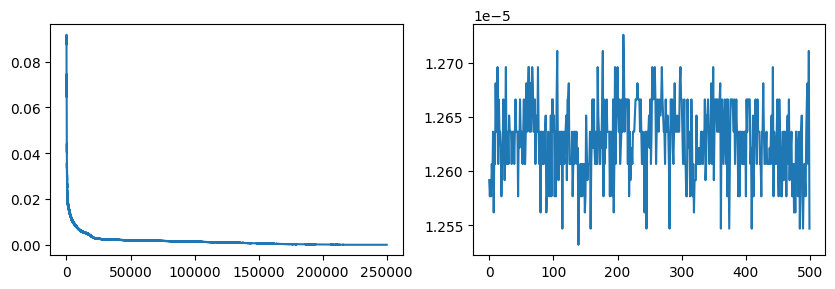

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].plot(L_loss)
ax[1].plot(L_loss[-500:])
plt.show()

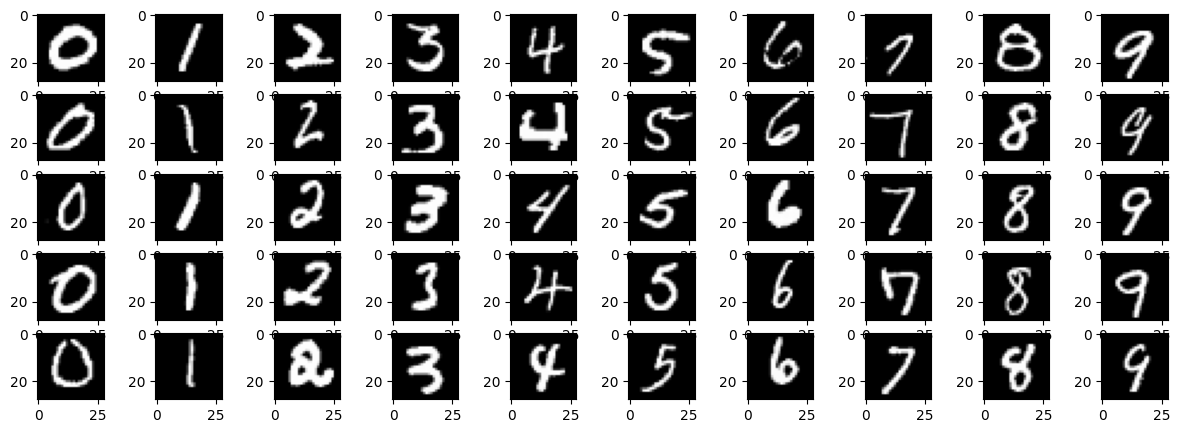

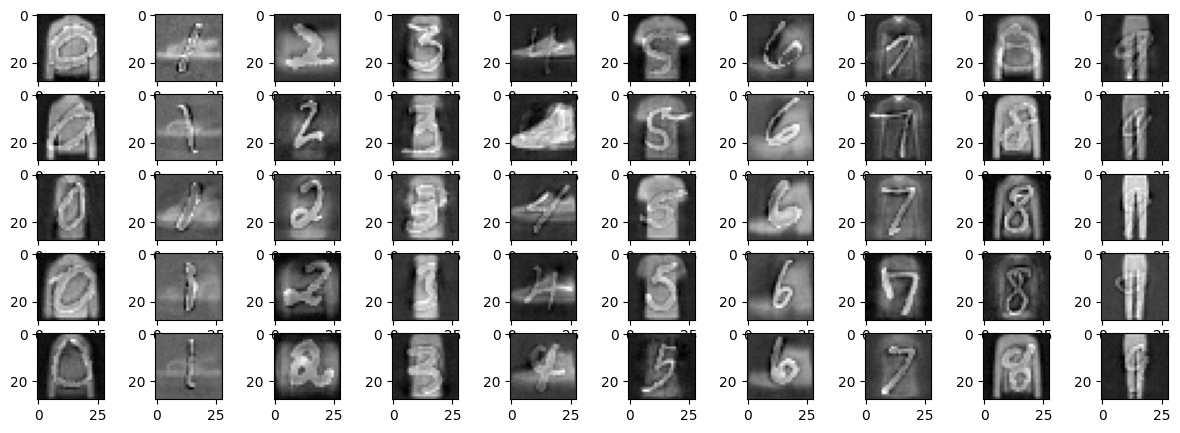

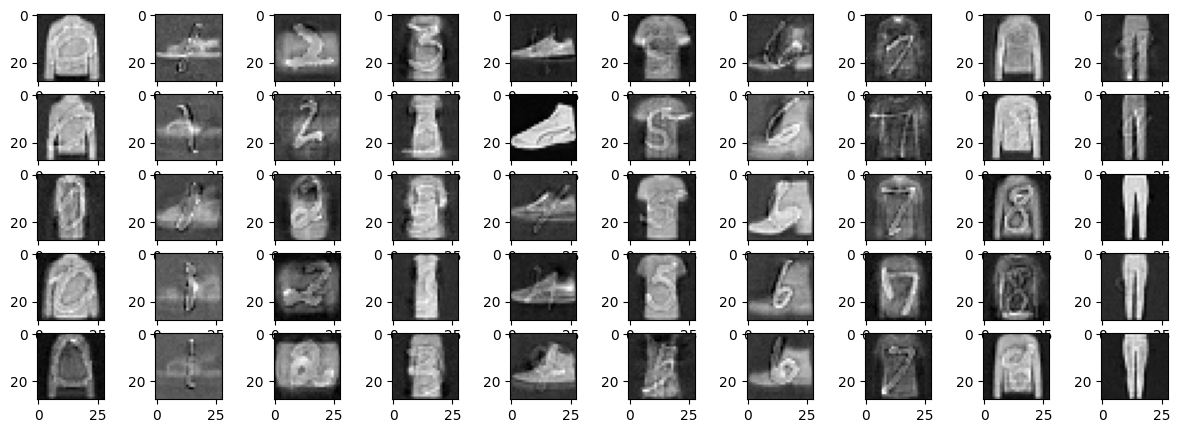

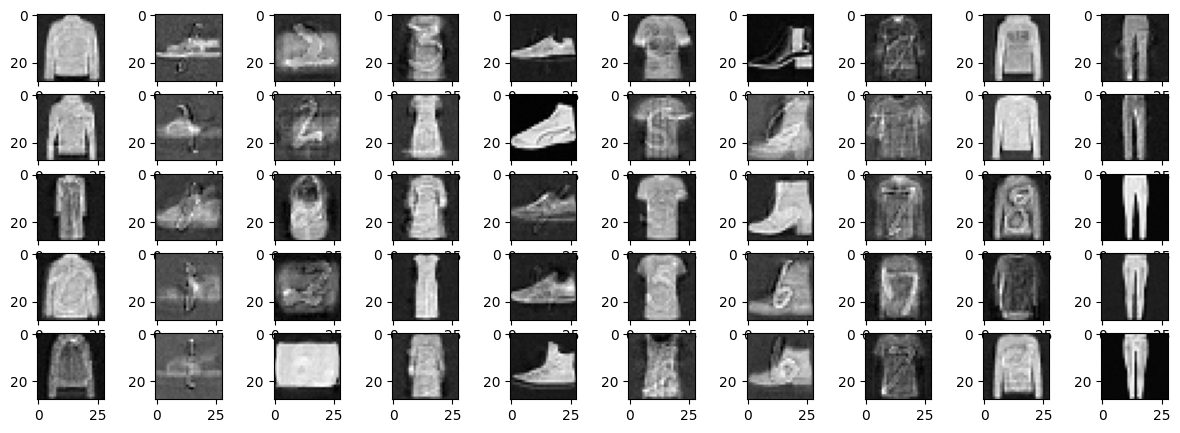

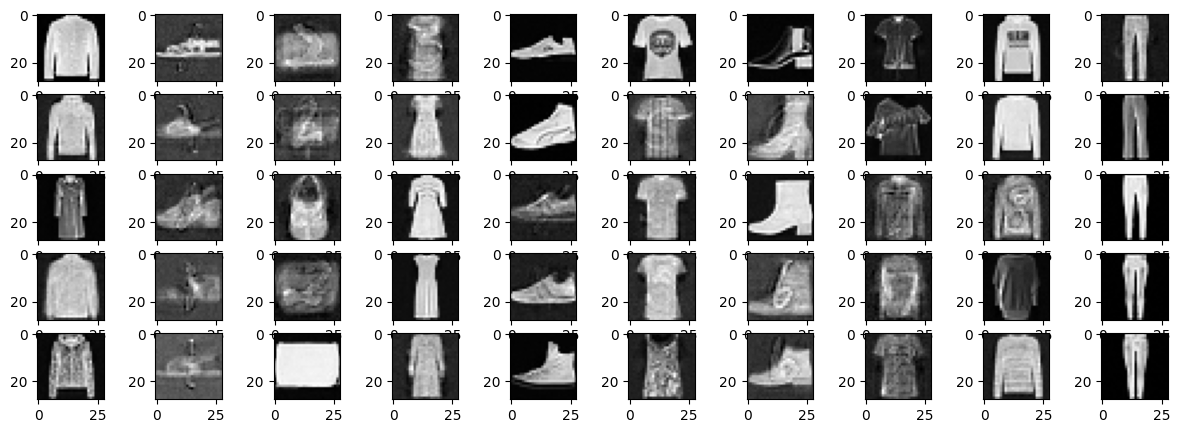

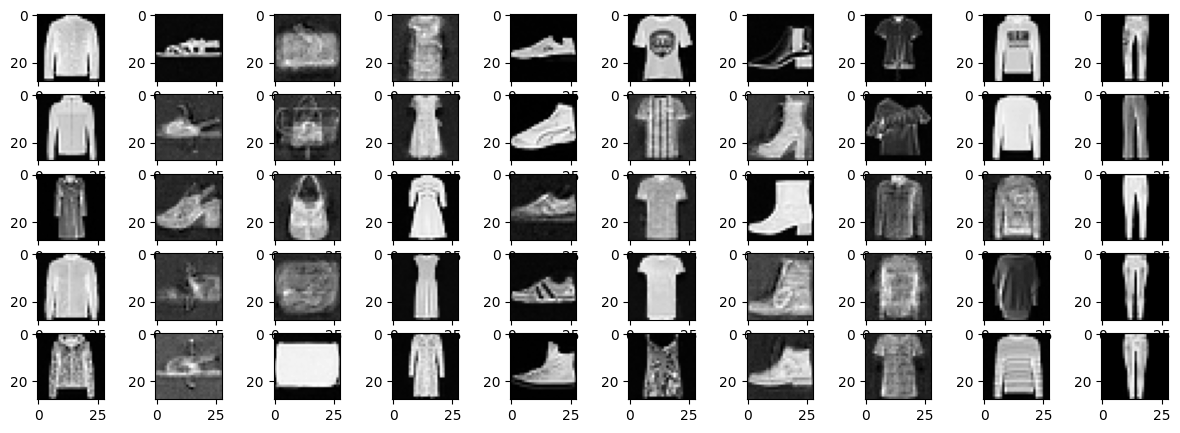

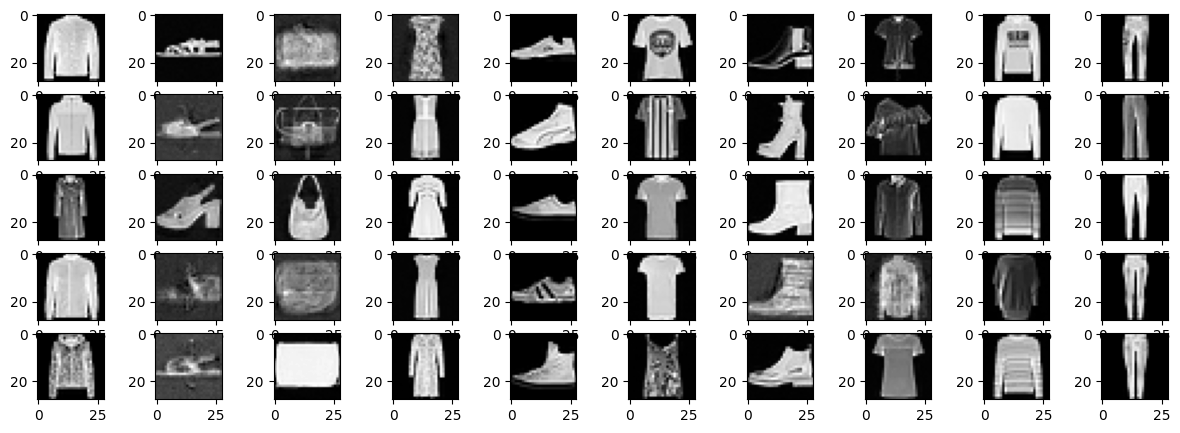

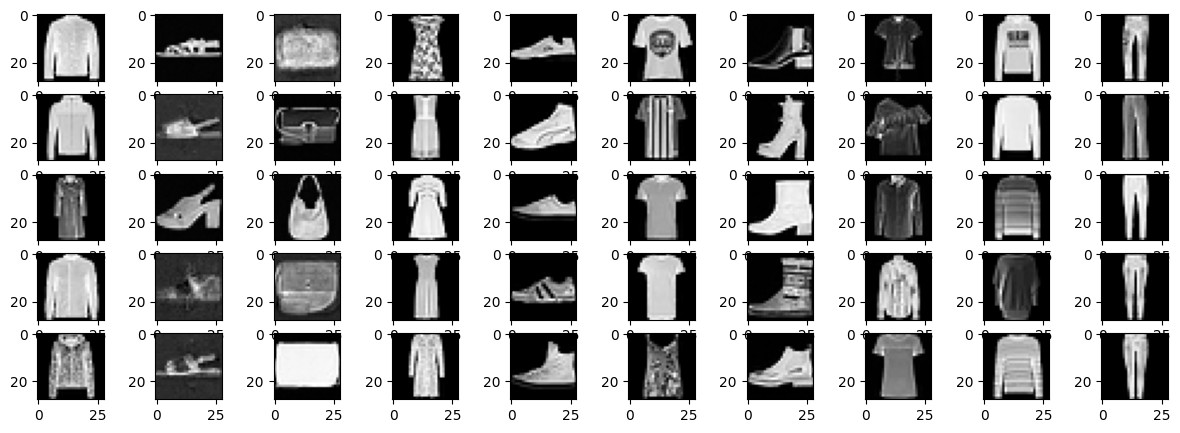

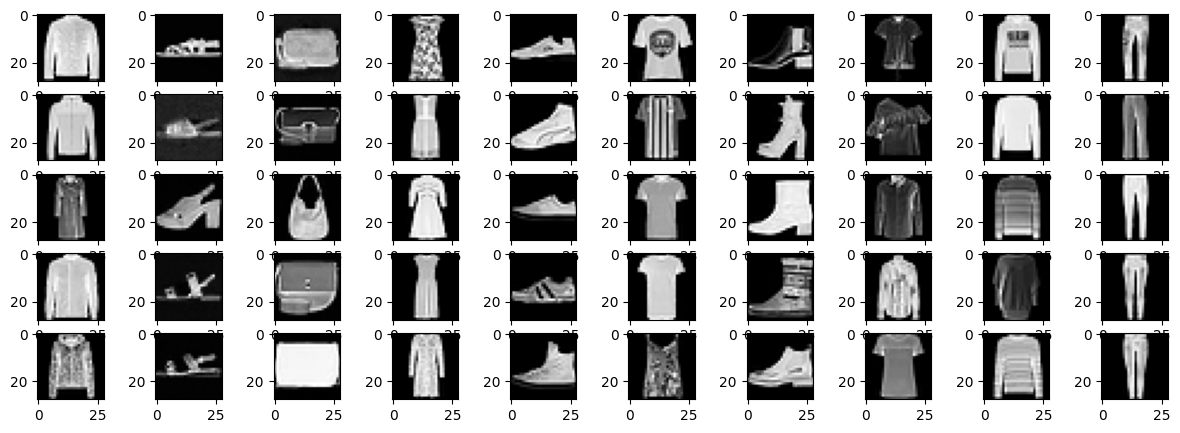

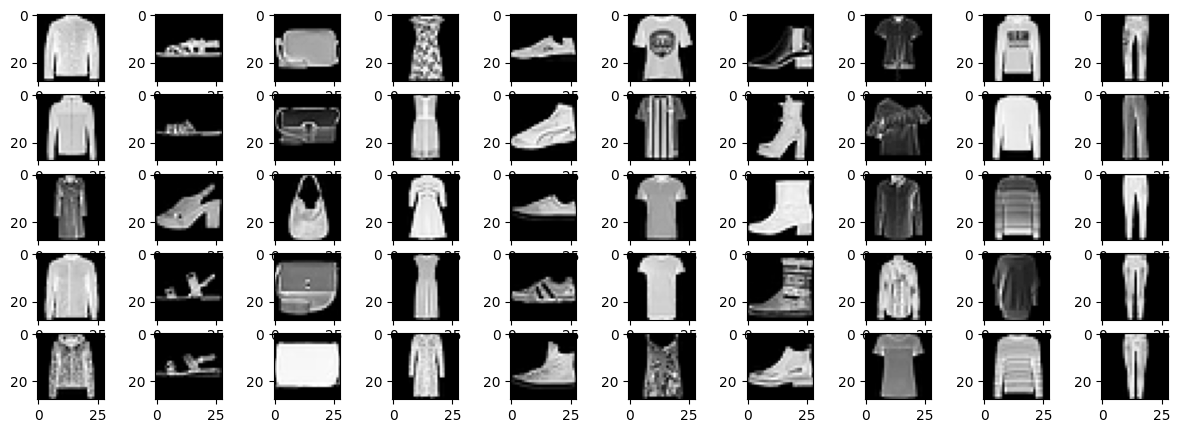

In [4]:
n_classes = 10

for xk in L_xk:
    fig, ax = plt.subplots(5, n_classes, figsize=(15,5))
    for k in range(n_classes):
        for i in range(5):
            ax[i, k].imshow(xk[k,i].reshape(28,28), "gray")
    plt.show()

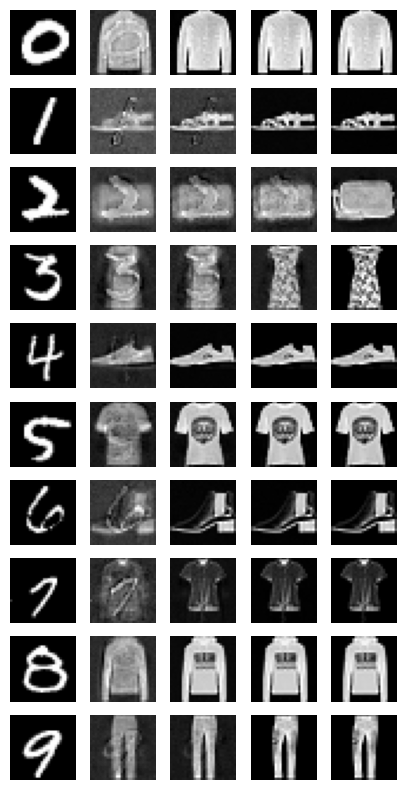

In [5]:
fig, ax = plt.subplots(n_classes, 5, figsize=(5, 10))

for k in range(n_classes):
    for i in range(5):
        ax[k, i].imshow(L_xk[2*i][k, 0].reshape(28, 28), "gray")
        ax[k, i].set_axis_off() #("off")
    
plt.show()

In [6]:
fig, ax = plt.subplots(n_classes, 10, figsize=(8, 8))

for k in range(n_classes):
    for i in range(10):
        ax[k, i].imshow(L_xk[i][k, 0].reshape(28, 28), "gray")
        ax[k, i].set_axis_off() #("off")
    
plt.show()

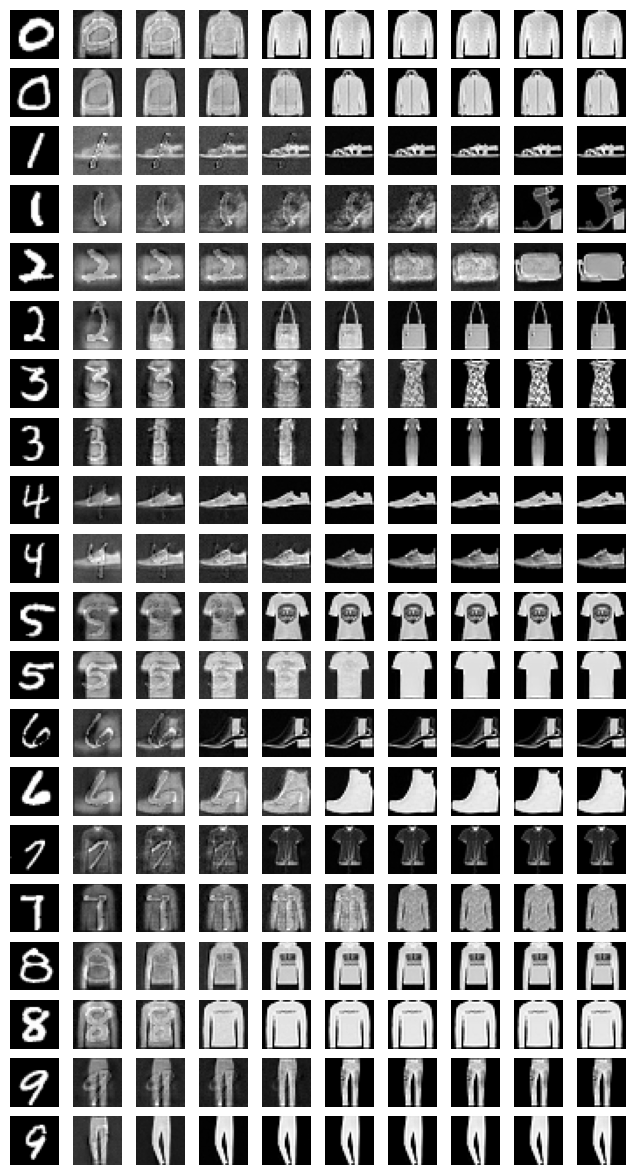

In [7]:
fig, ax = plt.subplots(2*n_classes, 10, figsize=(8, 15))

for k in range(n_classes):
    for i in range(10):
        ax[2*k, i].imshow(L_xk[i][k, 0].reshape(28, 28), "gray")
        ax[2*k, i].set_axis_off() #("off")

        ax[2*k+1, i].imshow(L_xk[i][k, 15].reshape(28, 28), "gray")
        ax[2*k+1, i].set_axis_off() #("off")
    
plt.show()

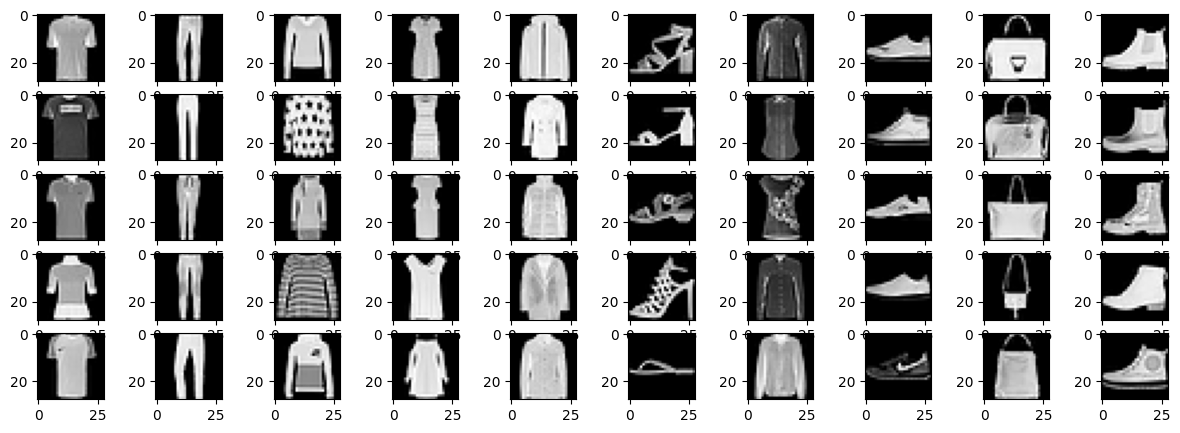

In [8]:
n_classes = 10

fig, ax = plt.subplots(5, n_classes, figsize=(15,5))
for k in range(n_classes):
    for i in range(5):
        ax[i, k].imshow(X_data_tgt[k,i].reshape(28,28), "gray")
plt.show()

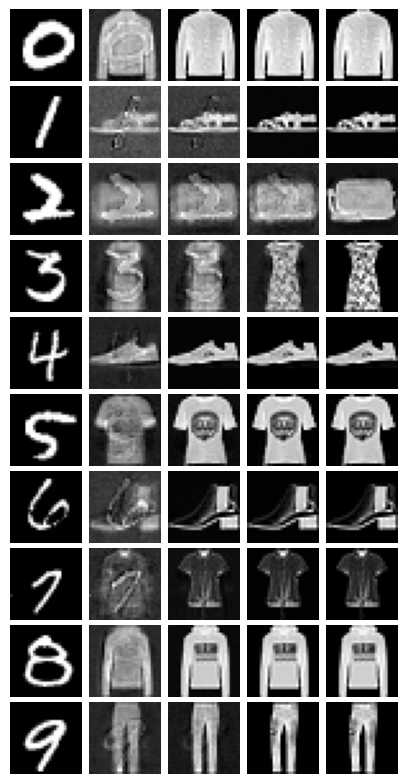

In [19]:
fig, ax = plt.subplots(n_classes, 5, figsize=(5, 10))

for k in range(n_classes):
    for i in range(5):
        ax[k, i].imshow(L_xk[2*i][k, 0].reshape(28, 28), "gray")
        ax[k, i].set_axis_off() #("off")

plt.subplots_adjust(wspace=0.1, hspace=0)
# plt.savefig("./Figures/Snapshots_MMDSW_MNIST_to_FMNIST.pdf", format="pdf", bbox_inches="tight") #, dpi=150)

plt.show()

### MNIST to KMNIST

In [2]:
rng = jax.random.PRNGKey(0)
master_key, key = jax.random.split(rng)

n_data_by_class = 200
src_dataset = "MNIST"
tgt_dataset = "KMNIST"
path_data = "~/torch_datasets"

lr = 0.05
n_epochs = 400000
m = 0.9

master_key, key_src, key_tgt, key_wgd = jax.random.split(master_key, num=4)

X_data_src, y_src, _, _ = get_dataset(key_src, src_dataset, n_data_by_class, path_data)
X_data_tgt, y_tgt, X_test, y_test = get_dataset(key_tgt, tgt_dataset, n_data_by_class, path_data)

target_grad = lambda x, y, key: target_value_and_grad_riesz(x, y, key, n_sample_batch=n_data_by_class)
L_loss, L_xk = wasserstein_gradient_descent_save(X_data_src, X_data_tgt, target_grad, key_wgd, lr=lr, m=m, n_epochs=n_epochs, save_interval=n_epochs//10)

Running for 400,000 iterations: 100%|██████████| 400000/400000 [57:04<00:00, 116.82it/s]


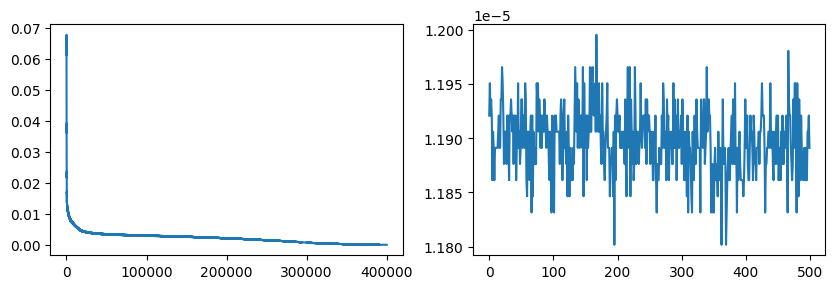

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].plot(L_loss)
ax[1].plot(L_loss[-500:])
plt.show()

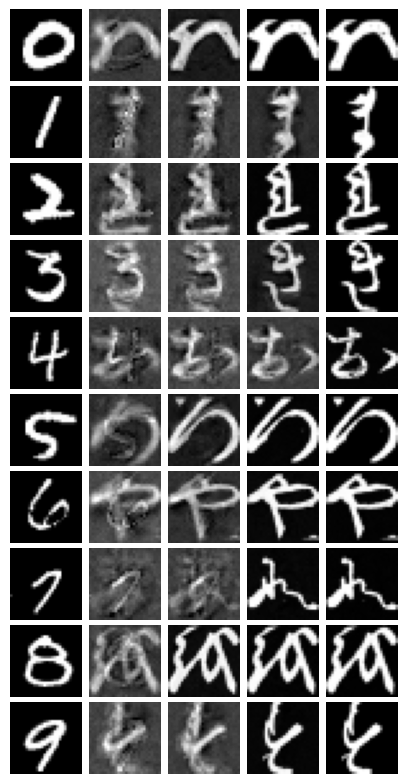

In [6]:
n_classes = 10

fig, ax = plt.subplots(n_classes, 5, figsize=(5, 10))

for k in range(n_classes):
    for i in range(5):
        ax[k, i].imshow(L_xk[2*i][k, 0].reshape(28, 28), "gray")
        ax[k, i].set_axis_off() #("off")

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig("./Figures/Snapshots_MMDSW_MNIST_to_KMNIST.pdf", format="pdf", bbox_inches="tight") #, dpi=150)

plt.show()

### MNIST to USPS

In [5]:
rng = jax.random.PRNGKey(0)
master_key, key = jax.random.split(rng)

n_data_by_class = 200
src_dataset = "MNIST"
tgt_dataset = "USPS"
path_data = "~/torch_datasets"

lr = 0.05
n_epochs = 150000 # 10000 # 200000
m = 0.9

master_key, key_src, key_tgt, key_wgd = jax.random.split(master_key, num=4)

X_data_src, y_src, _, _ = get_dataset(key_src, src_dataset, n_data_by_class, path_data)
X_data_tgt, y_tgt, X_test, y_test = get_dataset(key_tgt, tgt_dataset, n_data_by_class, path_data)

target_grad = lambda x, y, key: target_value_and_grad_riesz(x, y, key, n_sample_batch=n_data_by_class)
L_loss, L_xk = wasserstein_gradient_descent_save(X_data_src, X_data_tgt, target_grad, key_wgd, lr=lr, m=m, n_epochs=n_epochs, save_interval=n_epochs//10)

Running for 150,000 iterations: 100%|██████████| 150000/150000 [21:21<00:00, 117.04it/s]


In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].plot(L_loss)
ax[1].plot(L_loss[-500:])
plt.show()

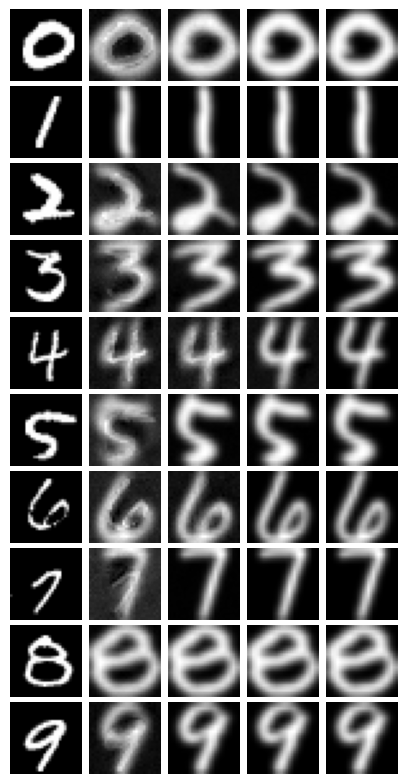

In [7]:
n_classes = 10

fig, ax = plt.subplots(n_classes, 5, figsize=(5, 10))

for k in range(n_classes):
    for i in range(5):
        ax[k, i].imshow(L_xk[2*i][k, 0].reshape(28, 28), "gray")
        ax[k, i].set_axis_off() #("off")

plt.subplots_adjust(wspace=0.1, hspace=0)
# plt.savefig("./Figures/Snapshots_MMDSW_MNIST_to_USPS.pdf", format="pdf", bbox_inches="tight") #, dpi=150)

plt.show()